In [4]:
import pandas as pd
import numpy as np
import os



ANNOT_CSV_FILE = 'GEMS-INN_2023-01-30_expert.csv'


GEMS_9 = ['Wonder', 'Transcendence', 'Nostalgia', 'Tenderness', 'Peacfulness', 'Joy', 'Power', 'Tension', 'Sadness']
NUM_CLASSES = len(GEMS_9)
GENRE_MAP = {'H': 'Hip-Hop', 'K': 'Classical', 'P': 'Pop'}

emma_df = pd.read_csv(ANNOT_CSV_FILE, encoding="ISO-8859-1")
emma_df.dropna(inplace=True)

In [8]:
from sklearn.preprocessing import MaxAbsScaler

#
transformer = MaxAbsScaler().fit(emma_df[GEMS_9])
annots = transformer.transform(emma_df[GEMS_9]) # inverse_transform(X)
annots


array([[0.42058586, 0.6119403 , 0.08695652, ..., 0.0496409 , 0.32193159,
        0.        ],
       [0.66353131, 0.14583333, 0.01915991, ..., 0.48014364, 0.26818051,
        0.03540414],
       [0.65654394, 0.57742537, 0.35101941, ..., 0.58048162, 0.        ,
        0.08350033],
       ...,
       [0.46869121, 0.0556592 , 0.24907885, ..., 0.23785382, 0.27680368,
        0.        ],
       [0.38806772, 0.28202736, 0.33775485, ..., 0.08998733, 0.26041966,
        0.11422846],
       [0.45632894, 0.36256219, 0.73593712, ..., 0.22644698, 0.04771486,
        0.16599866]])

In [ ]:
emma_df

In [3]:
mean_value_features = emma_df[GEMS_9].mean()

In [4]:
mean_value_features

Wonder           13.282973
Transcendence     9.536189
Nostalgia        13.177081
Tenderness        9.475270
Peacfulness      15.062568
Joy              19.696595
Power            12.221919
Tension           8.125811
Sadness           3.240432
dtype: float64

In [5]:
median_value_features = emma_df[GEMS_9].median()

In [6]:
median_value_features

Wonder           13.215
Transcendence     8.605
Nostalgia        12.455
Tenderness        7.745
Peacfulness      13.200
Joy              18.535
Power            10.590
Tension           6.275
Sadness           1.390
dtype: float64

In [8]:
emma_df[GEMS_9]

,Wonder,Transcendence,Nostalgia,Tenderness,Peacfulness,Joy,Power,Tension,Sadness
0,15.65,19.68,3.54,5.30,5.08,22.33,2.35,11.20,0.00
1,24.69,4.69,0.78,9.30,7.92,28.26,22.73,9.33,1.06
2,24.43,18.57,14.29,19.88,17.55,24.67,27.48,0.00,2.50
3,17.27,7.05,9.89,8.60,9.52,37.27,37.77,0.00,0.73
4,6.46,15.86,0.00,9.27,0.67,13.86,15.98,3.79,0.00
...,...,...,...,...,...,...,...,...,...
366,10.31,7.60,31.85,14.10,15.00,18.47,3.99,6.56,10.03
367,11.20,8.11,0.00,0.00,4.20,27.52,15.02,8.74,1.33
368,17.44,1.79,10.14,10.42,5.66,26.20,11.26,9.63,0.00
369,14.44,9.07,13.75,17.13,30.12,16.12,4.26,9.06,3.42


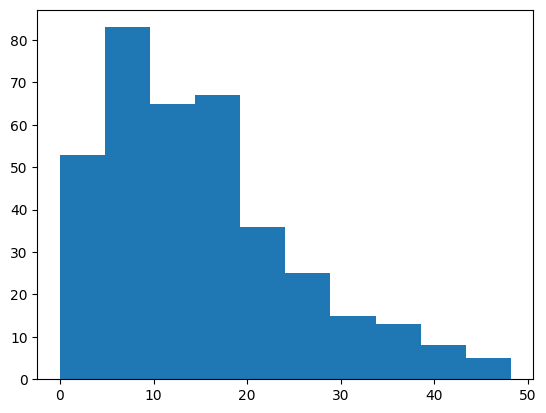

In [18]:
import matplotlib.pyplot as plt


# Plotting the bar chart
plt.hist(emma_df['Peacfulness'])

# Displaying the chart
plt.show()

In [5]:
error = emma_df[GEMS_9] - mean_value_features

In [6]:
error.head()

,Wonder,Transcendence,Nostalgia,Tenderness,Peacfulness,Joy,Power,Tension,Sadness
0,2.367027,10.143811,-9.637081,-4.17527,-9.982568,2.633405,-9.871919,3.074189,-3.240432
1,11.407027,-4.846189,-12.397081,-0.17527,-7.142568,8.563405,10.508081,1.204189,-2.180432
2,11.147027,9.033811,1.112919,10.40473,2.487432,4.973405,15.258081,-8.125811,-0.740432
3,3.987027,-2.486189,-3.287081,-0.87527,-5.542568,17.573405,25.548081,-8.125811,-2.510432
4,-6.822973,6.323811,-13.177081,-0.20527,-14.392568,-5.836595,3.758081,-4.335811,-3.240432


In [11]:
error**2

,Wonder,Transcendence,Nostalgia,Tenderness,Peacfulness,Joy,Power,Tension,Sadness
0,5.602817,102.896898,92.873332,17.432882,99.651655,6.934824,97.454783,9.450639,10.500402
1,130.120266,23.485550,153.687619,0.030720,51.016271,73.331912,110.419768,1.450072,4.754286
2,124.256212,81.609738,1.238589,108.258401,6.187320,24.734761,232.809038,66.028801,0.548240
3,15.896385,6.181137,10.804902,0.766098,30.720055,308.824578,652.704447,66.028801,6.302271
4,46.552960,39.990583,173.635466,0.042136,207.146001,34.065836,14.123173,18.799255,10.500402
...,...,...,...,...,...,...,...,...,...
366,8.838568,3.748829,348.677901,21.388125,0.003915,1.504534,67.764489,2.451763,46.098228
367,4.338776,2.034016,173.635466,89.780747,117.995374,61.205672,7.829258,0.377228,3.649752
368,17.280874,60.003447,9.223861,0.892514,88.408277,42.294282,0.925288,2.262585,10.500402
369,1.338712,0.217332,0.328236,58.594887,226.726271,12.792029,63.392153,0.872709,0.032245


In [8]:
error.apply(np.sqrt)

,Wonder,Transcendence,Nostalgia,Tenderness,Peacfulness,Joy,Power,Tension,Sadness
0,1.538515,3.184935,NaN,NaN,NaN,1.622777,NaN,1.753337,NaN
1,3.377429,NaN,NaN,NaN,NaN,2.926330,3.241617,1.097356,NaN
2,3.338716,3.005630,1.054950,3.225636,1.577160,2.230113,3.906159,NaN,NaN
3,1.996754,NaN,NaN,NaN,NaN,4.192065,5.054511,NaN,NaN
4,NaN,2.514719,NaN,NaN,NaN,NaN,1.938577,NaN,NaN
...,...,...,...,...,...,...,...,...,...
366,NaN,NaN,4.321217,2.150518,NaN,NaN,NaN,NaN,2.605680
367,NaN,NaN,NaN,NaN,NaN,2.797035,1.672747,0.783702,NaN
368,2.038879,NaN,NaN,0.971972,NaN,2.550178,NaN,1.226454,NaN
369,1.075652,NaN,0.756914,2.766718,3.880391,NaN,NaN,0.966535,0.423754


In [120]:
abs_error = error.apply(abs)
abs_error.sum()/370

Wonder           4.792789
Transcendence    4.416024
Nostalgia        7.479887
Tenderness       6.275874
Peacfulness      8.083254
Joy              8.661401
Power            7.235540
Tension          5.080157
Sadness          3.314967
dtype: float64

In [121]:
error.sum()/370

Wonder          -1.075416e-15
Transcendence    2.074017e-15
Nostalgia       -1.536309e-15
Tenderness      -1.843570e-15
Peacfulness      1.613124e-15
Joy              1.075416e-15
Power           -9.217852e-16
Tension         -7.681543e-16
Sadness         -3.072617e-16
dtype: float64

In [138]:
test = 0
for i in range(len(error)):
    #print(np.abs(error.iloc[i, ]))
    test += (error["Nostalgia"].iloc[i,])
    #print(test)
    #mean_errors += error.iloc[i, ]

test = test/370
print(test)

-1.593920191029414e-15


In [136]:
for column in error.columns:
    
    

        mean_abs_errors += np.abs(value)
        mean_errors += value
    mean_abs_errors /= 370
    mean_errors /= 370

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

In [57]:
test_wonder = error["Wonder"]


TypeError: 'type' object is not subscriptable

In [48]:
for i in range(len(test_wonder)):
    test_wonder[i]

KeyError: 230

In [38]:
error.mean()

Wonder          -1.075416e-15
Transcendence    2.074017e-15
Nostalgia       -1.536309e-15
Tenderness      -1.843570e-15
Peacfulness      1.613124e-15
Joy              1.075416e-15
Power           -9.217852e-16
Tension         -7.681543e-16
Sadness         -3.072617e-16
Sublimity        6.145234e-16
Vitality         2.688540e-16
Unease           1.229047e-15
ICC              2.400482e-18
Familiarity     -3.456694e-16
Liking           7.681543e-17
dtype: float64

In [ ]:
def Average_model():
    
